In [1]:
#pip install -U scikit-learn

In [2]:
#pip install tensorflow

Import and stuffs

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

initializing the features and target

In [5]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

with h5py.File('/home/jovyan/Data/FOF_Subfind/IllustrisTNG//LH/LH_0/fof_subhalo_tab_013.hdf5', 'r') as hf:
    print (hf['Subhalo'].keys())
    gmetal = hf['Subhalo/SubhaloGasMetallicity'][:]
    sfr = hf['Subhalo/SubhaloSFR'][:]
    lntype = hf['Subhalo/SubhaloLenType'][:]

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [6]:
pdgmetal = np.log10((pd.DataFrame(gmetal, columns=['Gas Metallicity']))*(10**10))
pdsfr = np.log10((pd.DataFrame(sfr, columns=['Stellar Formation Rate']))*(10**10))

In [7]:
glen = lntype[:,0]
dmlen = lntype[:,1]
stlen = lntype[:,4]
bhlen = lntype[:,5]

In [8]:
glen

array([80021, 52868, 21900, ...,     0,     0,     0], dtype=int32)

Converting into the log space for convinence

In [9]:
pdglen = np.log10((pd.DataFrame(glen, columns=['Gas len']))*(10**10))
pddmlen = np.log10((pd.DataFrame(dmlen, columns=['Dark Matter len']))*(10**10))
pdstlen = np.log10((pd.DataFrame(stlen, columns=['Stellar len']))*(10**10))
pdbhlen = np.log10((pd.DataFrame(bhlen, columns=['Black Hole len']))*(10**10))

In [10]:
pdsfr = np.log10((pd.DataFrame(sfr, columns=['Stellar Formation Rate']))*(10**10))

Text(0, 0.5, 'Predicted Dark Matter len by Decision Tree Regressor')

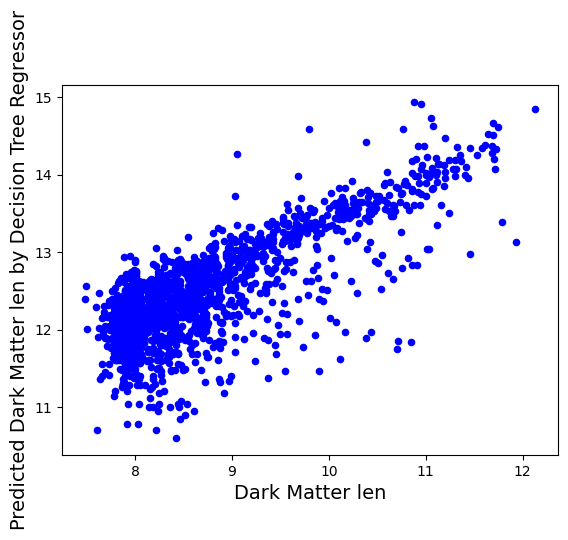

In [11]:
plt.scatter(pdsfr,pdglen, s = 20, c = 'blue')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Decision Tree Regressor',fontsize=14)

**CASE 1: Replacing 0s with 10^-8, inf and NaN with 0s**

In [12]:
pdgmetal.replace(to_replace = -np.inf, value = 8, inplace=True)
pdsfr.replace(to_replace = -np.inf, value = 8, inplace=True)
pdglen.replace(to_replace = -np.inf, value = 8, inplace=True)
pddmlen.replace(to_replace = -np.inf, value = 8, inplace=True)
pdstlen.replace(to_replace = -np.inf, value = 8, inplace=True)
pdbhlen.replace(to_replace = -np.inf, value = 8, inplace=True) 

pdgmetal.fillna(0,inplace=True)
pdsfr.fillna(0,inplace=True)
pdglen.fillna(0,inplace=True)
pddmlen.fillna(0,inplace=True)
pdstlen.fillna(0,inplace=True)
pdbhlen.fillna(0,inplace=True)

In [13]:
pdglen

,Gas len
0,14.903204
1,14.723193
2,14.340444
3,13.958134
4,13.385606
...,...
20911,8.000000
20912,8.000000
20913,8.000000
20914,8.000000


In [14]:
features = pd.concat([pdgmetal, pdsfr, pdglen, pdstlen, pdbhlen], axis=1)
target = pddmlen
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [15]:
x_train

,Gas Metallicity,Stellar Formation Rate,Gas len,Stellar len,Black Hole len
3389,8.0,8.0,10.301030,8.0,8.0
11692,8.0,8.0,11.447158,8.0,8.0
20165,8.0,8.0,8.000000,8.0,8.0
6696,8.0,8.0,11.934498,8.0,8.0
11058,8.0,8.0,11.278754,8.0,8.0
...,...,...,...,...,...
11285,8.0,8.0,11.380211,8.0,8.0
13732,8.0,8.0,10.602060,8.0,8.0
18238,8.0,8.0,8.000000,8.0,8.0
6302,8.0,8.0,11.505150,8.0,8.0


Case 1a : **Decision Tree** Model

prediction :  [12.25686079 11.55958676 12.186101   ... 11.47928133 11.65057032
 11.47928133]
R2 Score :  0.8262748628789033
The mean square value :  0.04278553989267216
The Score :  {'fit_time': array([0.01872706, 0.01674104, 0.02176499, 0.01815224, 0.01769352,
       0.01784706, 0.01790524]), 'score_time': array([0.00490046, 0.00541234, 0.00573325, 0.00530839, 0.00474286,
       0.00504041, 0.00544643]), 'test_score': array([0.81404346, 0.8156778 , 0.80320122, 0.84030604, 0.86429867,
       0.84384084, 0.76175036]), 'train_score': array([0.89779352, 0.89906337, 0.89302144, 0.90015596, 0.89794198,
       0.89740922, 0.89574186])}
Test Score :  0.82044548531269
Train Score :  0.8973039071424368
Cross Vaidate prediction :  [15.1449383  15.0376177  14.74090719 ... 11.47672359 11.47887735
 11.4771801 ]
Pearson Correlation Coefficient: [0.9058645737521752]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter len by Decision Tree Regressor')

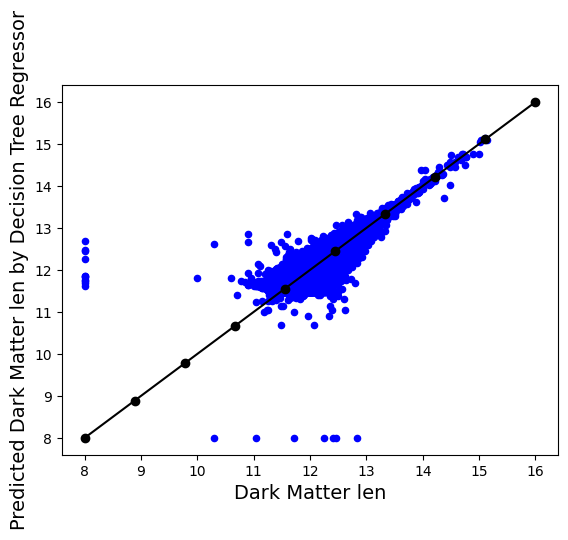

In [16]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print ("prediction : ", y_pred)

r = r2_score(y_test, y_pred)
print ("R2 Score : ", r)

mse = mean_squared_error(y_test, y_pred)
print ("The mean square value : ", mse)

scores = cross_validate(regressor,features,target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
s = np.mean(scores['test_score'])
print ("The Score : ", scores)
print ("Test Score : ", s)
print ("Train Score : ", np.mean(scores['train_score']))

cvpred = cross_val_predict(regressor,features,target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", cvpred)

c_coeff, p_value = stats.pearsonr(cvpred, target)
print("Pearson Correlation Coefficient:", c_coeff)
print("P-value:", p_value)

m = np.linspace(8, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')
plt.scatter(target,cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Decision Tree Regressor',fontsize=14)

Case 1b : **knn** Model

prediction :  [[12.25686079]
 [11.58680749]
 [12.306247  ]
 ...
 [11.36563667]
 [11.78699063]
 [11.36563667]]
R2 Score :  0.8276516315278393
The mean square value :  0.04244646524332556
The Score :  {'fit_time': array([0.0190506 , 0.01859903, 0.0191505 , 0.01751351, 0.01817989]), 'score_time': array([0.1240952 , 0.13089347, 0.1170032 , 0.1141901 , 0.11078095]), 'test_score': array([0.57932096, 0.52261783, 0.39612777, 0.53839937, 0.41353792]), 'train_score': array([0.59856725, 0.56447173, 0.39863213, 0.57939404, 0.48353079])}
Test Score :  0.4900007689803256
Train Score :  0.5249191896749063
Cross Vaidate prediction :  [[14.96757148]
 [14.97978699]
 [14.41397942]
 ...
 [12.09261461]
 [11.89569012]
 [11.99377339]]
Pearson Correlation Coefficient: [0.7743886322206364]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter len by KNN Regressor model')

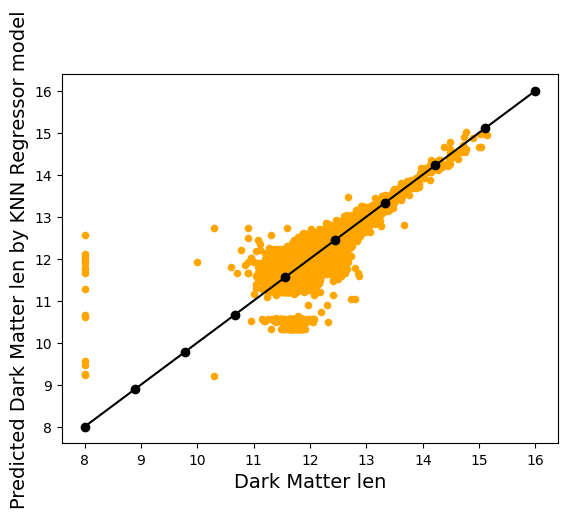

In [17]:
knnregressor = KNeighborsRegressor(n_neighbors=3)
knnregressor.fit(x_train, y_train)
ky_pred = knnregressor.predict(x_test)
print ("prediction : ", ky_pred)

kr = r2_score(y_test, ky_pred)
print ("R2 Score : ", kr)

kmse = mean_squared_error(y_test, ky_pred)
print ("The mean square value : ", kmse)

kscores = cross_validate(knnregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
ks = np.mean(kscores['test_score'])
print ("The Score : ", kscores)
print ("Test Score : ", ks)
print ("Train Score : ", np.mean(kscores['train_score']))

kcvpred = cross_val_predict(knnregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", kcvpred)

kc_coeff, kp_value = stats.pearsonr(kcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", kc_coeff)
print("P-value:", kp_value)

m = np.linspace(8, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(target,kcvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by KNN Regressor model',fontsize=14)

Case 1c : **Linear** Model

prediction :  [[12.28247645]
 [11.75862568]
 [11.92643902]
 ...
 [11.38741007]
 [11.82012767]
 [11.38741007]]
R2 Score :  0.6960064964813417
The mean square value :  0.07486841793565208
The Score :  {'fit_time': array([0.00763273, 0.00713968, 0.19922662, 0.00791907, 0.19814134]), 'score_time': array([0.00484538, 0.19193864, 0.00512886, 0.19175243, 0.19465184]), 'test_score': array([0.63848874, 0.66630988, 0.66379453, 0.68205883, 0.66993617]), 'train_score': array([0.67090515, 0.66339595, 0.66412668, 0.65984915, 0.66248361])}
Test Score :  0.6641176300182241
Train Score :  0.6641521070285522
Cross Vaidate prediction :  [[13.99530688]
 [14.04168925]
 [13.81980563]
 ...
 [11.38483131]
 [11.38768427]
 [11.38825386]]
Pearson Correlation Coefficient: [0.8146472633845542]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter len by Linear Regression model')

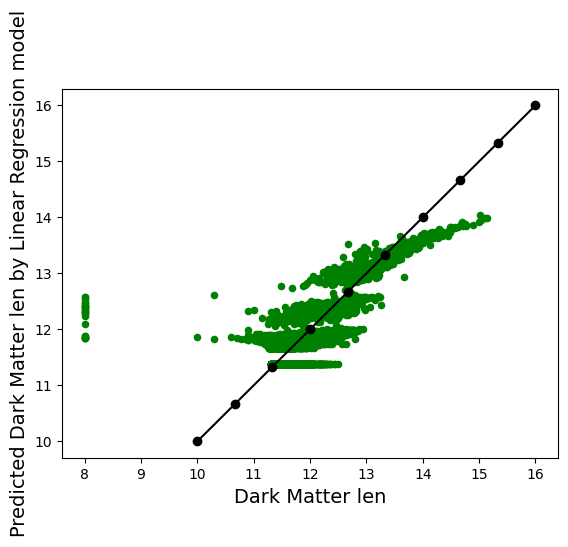

In [18]:
linregressor = LinearRegression()
linregressor.fit(x_train, y_train)
ly_pred = linregressor.predict(x_test)
print ("prediction : ", ly_pred)

lr = r2_score(y_test, ly_pred)
print ("R2 Score : ", lr)

lmse = mean_squared_error(y_test, ly_pred)
print ("The mean square value : ", lmse)

lscores = cross_validate(linregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
ls = np.mean(lscores['test_score'])
print ("The Score : ", lscores)
print ("Test Score : ", ls)
print ("Train Score : ", np.mean(lscores['train_score']))

lcvpred = cross_val_predict(linregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", lcvpred)

m = np.linspace(10, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

lc_coeff, lp_value = stats.pearsonr(lcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", lc_coeff)
print("P-value:", lp_value)

plt.scatter(target,lcvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Linear Regression model',fontsize=14)

Case 1d : **Random Forest** Model

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


prediction :  [12.24800528 11.55980459 12.18586321 ... 11.47941813 11.64707367
 11.47941813]
R2 Score :  0.8542462646605873
The mean square value :  0.03589666044427098


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: Dat

The Score :  {'fit_time': array([0.90596128, 0.92052317, 0.91691947, 0.91276908, 0.93781424]), 'score_time': array([0.05335879, 0.04789829, 0.04519677, 0.05326319, 0.06560636]), 'test_score': array([0.83065545, 0.84846871, 0.84842645, 0.87654731, 0.82616474]), 'train_score': array([0.89104154, 0.88992849, 0.89082375, 0.88849666, 0.89208528])}
Test Score :  0.8460525331592234
Train Score :  0.8904751412385938


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044:

Cross Vaidate prediction :  [15.08403094 14.97548968 14.67251909 ... 11.47659536 11.47919211
 11.47787899]
Pearson Correlation Coefficient: [0.9190039476265339]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter len by Random Forrest Regression model')

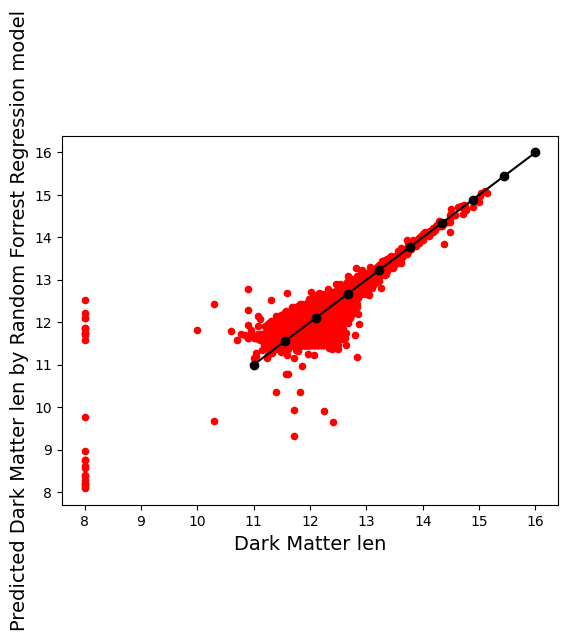

In [19]:
foregressor = RandomForestRegressor()
foregressor.fit(x_train, y_train)
foy_pred = foregressor.predict(x_test)
print ("prediction : ", foy_pred)

fr = r2_score(y_test, foy_pred)
print ("R2 Score : ", fr)

fmse = mean_squared_error(y_test, foy_pred)
print ("The mean square value : ", fmse)

fscores = cross_validate(foregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
fs = np.mean(fscores['test_score'])
print ("The Score : ", fscores)
print ("Test Score : ", fs)
print ("Train Score : ", np.mean(fscores['train_score']))

fcvpred = cross_val_predict(foregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", fcvpred)

fc_coeff, fp_value = stats.pearsonr(fcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", fc_coeff)
print("P-value:", fp_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(target,fcvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Random Forrest Regression model',fontsize=14)

Case 1e : **Extra Trees Forest** Model

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


prediction :  [12.25686079 11.55958676 12.186101   ... 11.47928133 11.65057032
 11.47928133]
R2 Score :  0.848733715555182
The mean square value :  0.03725430732006667


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: Dat

The Score :  {'fit_time': array([0.67988467, 0.6826911 , 0.69306993, 0.65512323, 0.64091682]), 'score_time': array([0.05254316, 0.05335212, 0.0536387 , 0.0527389 , 0.05041289]), 'test_score': array([0.82967935, 0.853055  , 0.8569025 , 0.87362261, 0.81636948]), 'train_score': array([0.89802877, 0.89646874, 0.89843195, 0.89647463, 0.89808515])}
Test Score :  0.8459257909300083
Train Score :  0.8974978497085575


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044:

Cross Vaidate prediction :  [15.05561782 14.97277249 14.56023364 ... 11.47678653 11.47914102
 11.47784889]
Pearson Correlation Coefficient: [0.9194360646532471]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter len by Extra Randomized forest')

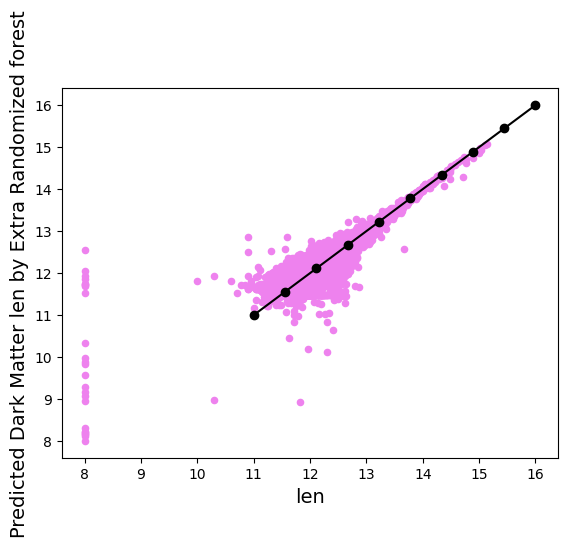

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
etregressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
etregressor.fit(x_train, y_train)

ety_pred = etregressor.predict(x_test)
print ("prediction : ", ety_pred)

etr = r2_score(y_test, ety_pred)
print ("R2 Score : ", etr)

etmse = mean_squared_error(y_test, ety_pred)
print ("The mean square value : ", etmse)

etscores = cross_validate(etregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
ets = np.mean(etscores['test_score'])
print ("The Score : ", etscores)
print ("Test Score : ", ets)
print ("Train Score : ", np.mean(etscores['train_score']))

etcvpred = cross_val_predict(etregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", etcvpred)

etc_coeff, etp_value = stats.pearsonr(etcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", etc_coeff)
print("P-value:", etp_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(target,etcvpred, s = 20, c = 'violet')
plt.xlabel('len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Extra Randomized forest',fontsize=14)

Case 1f : **Neural Network** Model

2023-07-26 19:14:40.361124: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-26 19:14:40.361219: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-26 19:14:46.987665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-26 19:14:46.987862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-26 19:14:46.987883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

Epoch 1/50
523/523 [==============================] - 3s 4ms/step - loss: 5.3562 - val_loss: 0.0845
Epoch 2/50
523/523 [==============================] - 2s 4ms/step - loss: 0.0909 - val_loss: 0.0790
Epoch 3/50
523/523 [==============================] - 2s 4ms/step - loss: 0.0874 - val_loss: 0.0916
Epoch 4/50
523/523 [==============================] - 2s 4ms/step - loss: 0.0747 - val_loss: 0.0647
Epoch 5/50
523/523 [==============================] - 2s 4ms/step - loss: 0.0709 - val_loss: 0.0626
Epoch 6/50
523/523 [==============================] - 2s 4ms/step - loss: 0.0669 - val_loss: 0.0655
Epoch 7/50
523/523 [==============================] - 2s 4ms/step - loss: 0.0662 - val_loss: 0.0547
Epoch 8/50
523/523 [==============================] - 2s 4ms/step - loss: 0.0626 - val_loss: 0.0560
Epoch 9/50
523/523 [==============================] - 2s 5ms/step - loss: 0.0597 - val_loss: 0.0527
Epoch 10/50
523/523 [==============================] - 3s 5ms/step - loss: 0.0611 - val_loss: 0.0546

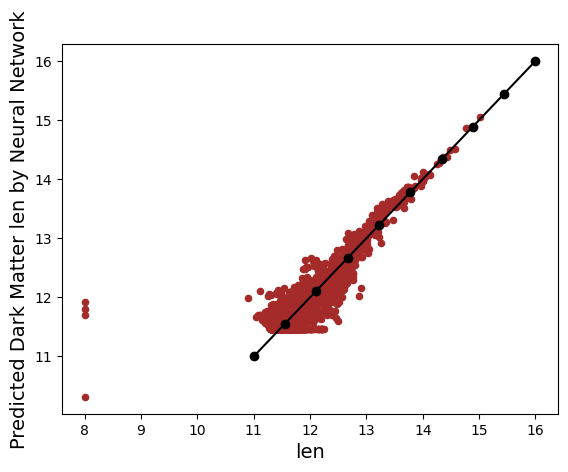

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

nnmodel = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(features.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

nnmodel.compile(optimizer='adam', loss='mean_squared_error')
history = nnmodel.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

nny_pred = nnmodel.predict(x_test)
print("Prediction:", nny_pred)

nnr2 = r2_score(y_test, nny_pred)
print("R2 Score:", nnr2)

nnmse = mean_squared_error(y_test, nny_pred)
print("Mean Square Value:", nnmse)

nnc_coeff, nnp_value = stats.pearsonr(nny_pred.reshape((4184,)), y_test)
print("Pearson Correlation Coefficient:", nnc_coeff)
print("P-value:", nnp_value)

plt.scatter(y_test, nny_pred, s=20, c='brown')
plt.xlabel('len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Neural Network', fontsize=14)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

loss = nnmodel.evaluate(x_test, y_test)
print("Neural Network nnmodel Loss:", loss)


**CASE 2: Removing 0s, inf and NaN**

In [22]:
df = pd.DataFrame(pdgmetal)
df['Stellar Formation Rate'] = pdsfr
df['Gas len'] = pdglen
df['Stellar len'] = pdstlen
df['Black Hole len'] = pdbhlen
df['Dark Matter len'] = pddmlen

In [23]:
df['Gas Metallicity'] = df['Gas Metallicity'][(df['Gas Metallicity'] != 10**-8) & (~np.isinf(df['Gas Metallicity']))]
df['Stellar Formation Rate'] = df['Stellar Formation Rate'][(df['Stellar Formation Rate'] != 10**-8) & (~np.isinf(df['Stellar Formation Rate']))]
df['Gas len'] = df['Gas len'][(df['Gas len'] != 8) & (~np.isinf(df['Gas len']))]
df['Stellar len'] = df['Stellar len'][(df['Stellar len'] != 8) & (~np.isinf(df['Stellar len']))]
df['Black Hole len'] = df['Black Hole len'][(df['Black Hole len'] != 8) & (~np.isinf(df['Black Hole len']))]
df['Dark Matter len'] = df['Dark Matter len'][(df['Dark Matter len'] != 8) & (~np.isinf(df['Dark Matter len']))]

In [24]:
df

,Gas Metallicity,Stellar Formation Rate,Gas len,Stellar len,Black Hole len,Dark Matter len
0,8.057472,10.950654,14.903204,14.085433,10.00000,15.100546
1,7.860175,11.054806,14.723193,14.270469,10.30103,15.019249
2,8.336870,11.456070,14.340444,13.809492,10.00000,14.496764
3,8.023746,11.436424,13.958134,13.222716,10.00000,14.010639
4,8.313321,11.791765,13.385606,13.656577,10.00000,13.597366
...,...,...,...,...,...,...
20911,8.000000,8.000000,NaN,NaN,NaN,11.322219
20912,8.000000,8.000000,NaN,NaN,NaN,11.431364
20913,8.000000,8.000000,NaN,NaN,NaN,11.414973
20914,8.000000,8.000000,NaN,NaN,NaN,11.342423


In [25]:
ddf = df.dropna()

In [26]:
Features = ddf[['Gas Metallicity', 'Stellar Formation Rate', 'Gas len', 'Stellar len', 'Black Hole len']]
Target = ddf['Dark Matter len']
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.1)

In [27]:
X_train

,Gas Metallicity,Stellar Formation Rate,Gas len,Stellar len,Black Hole len
2799,8.000000,8.446922,12.608526,10.000000,10.0
3315,7.384034,8.000000,12.217484,10.903090,10.0
762,7.827455,11.036030,13.037426,12.546543,10.0
2689,6.830535,8.975581,12.710117,11.079181,10.0
1390,7.372507,9.542368,12.344392,11.301030,10.0
...,...,...,...,...,...
2847,6.341988,8.000000,12.322219,10.477121,10.0
3353,7.266267,8.000000,12.227887,10.778151,10.0
2771,6.596794,8.189157,12.264818,10.602060,10.0
863,8.199298,11.686545,14.272097,13.587374,10.0


Case 2a : **Decision Tree** Model

prediction :  [13.7573201  12.76789762 13.06107532 13.00518051 13.42291798 12.90955603
 13.01072387 13.69125836 12.82151353 14.11203495 12.84073323 13.10380372
 12.95133752 13.10243371 13.45863785 13.54095481 12.98989456 13.93480134
 13.04688519 12.45331834 13.16046853 12.96894968 12.85369821 13.69258256
 12.83314711 12.92839585 12.96894968 13.7573201  13.73126635 12.54406804
 13.14550717 13.00043408 13.198107   12.92012333 12.76789762 12.89376176
 12.80888587 12.87966921 12.84135947 12.76267856 12.90848502 13.69222984
 12.78958071 14.0909983  12.6009729  14.11203495 13.93480134 13.46448955
 12.91855453 13.0187005  14.28970041 14.1766121  13.11660774 12.98989456
 12.97543181 12.43775056 12.65417654 12.63848926 13.08600371 13.05499586
 13.61129836 13.96496637 12.94250411 13.08529058 13.54132958 12.86628734
 12.95904139 12.82736927 12.96661099 13.57829531 12.23552845 12.80140371
 13.14019368 14.13846059 13.34869419 12.39269695 12.13987909 12.75891189
 12.92012333 13.75350646 12.78031731 

Text(0, 0.5, 'Predicted Dark Matter len by Decision Tree Regressor')

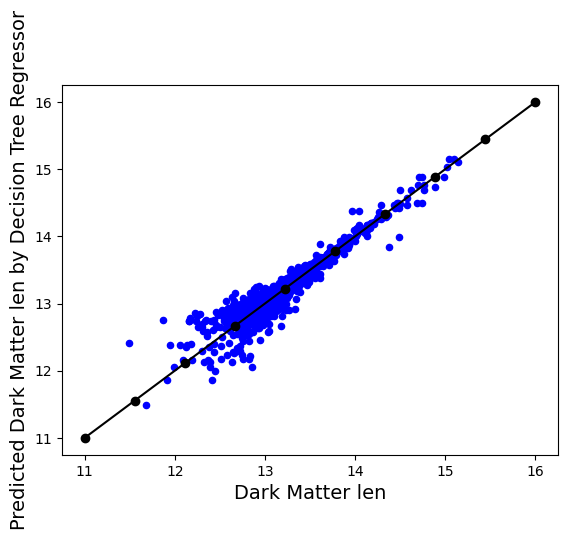

In [28]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

C_coeff, P_value = stats.pearsonr(Cvpred.reshape((1062,)), Target)
print("Pearson Correlation Coefficient:", C_coeff)
print("P-value:", P_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,Cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Decision Tree Regressor',fontsize=14)

Case 2b : **KNN** Model

prediction :  [13.6993564  12.54058059 13.06053163 12.77096254 13.36166468 13.06081795
 13.12339456 13.78392948 12.89233413 14.06359749 12.89259282 13.0564716
 12.99837628 13.23316882 13.43707409 13.49761555 12.88806252 13.88307268
 13.04065901 12.93581056 13.18365211 12.93893555 12.85714128 13.71845896
 12.67105645 12.91501856 13.04145837 13.78426789 13.63967974 12.66046612
 12.92988708 13.06341701 13.18154128 13.08228183 12.78290813 12.93709183
 12.92634289 12.94065898 12.79903322 12.87138726 12.93565336 13.67776111
 13.0079258  14.09470947 12.9991562  14.07734951 13.84274027 13.4493959
 12.86939988 13.15956722 14.16745264 14.16899727 13.11265443 13.0186965
 13.02719008 12.73892896 12.70518405 12.80294755 13.01754001 13.07111467
 13.62528863 13.88307268 13.07572604 13.14692669 13.42237972 12.9002748
 12.99198103 12.96863633 12.99338265 13.62196579 12.34834701 12.85059831
 13.0520747  14.21219659 13.21052783 12.54203139 12.58352328 12.83466223
 12.91768686 13.7123339  12.97198804 12.8

Text(0, 0.5, 'Predicted Dark Matter len by KNN Regressor')

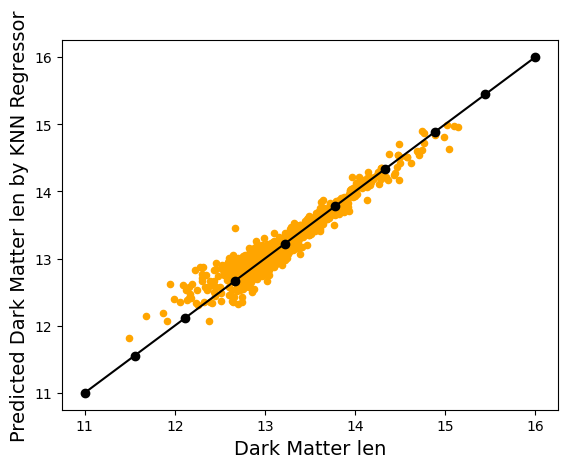

In [29]:
KnnRegressor = KNeighborsRegressor(n_neighbors=3)
KnnRegressor.fit(X_train, Y_train)
KY_pred = KnnRegressor.predict(X_test)
print ("prediction : ", KY_pred)

KR = r2_score(Y_test, KY_pred)
print ("R2 Score : ", KR)

KMse = mean_squared_error(Y_test, KY_pred)
print ("The mean square value : ", KMse)

KScores = cross_validate(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
KS = np.mean(KScores['test_score'])
print ("The Score : ", KScores)
print ("Test Score : ", KS)
print ("Train Score : ", np.mean(KScores['train_score']))

KCvpred = cross_val_predict(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", KCvpred)

KC_coeff, KP_value = stats.pearsonr(KCvpred.reshape((1062,)), Target)
print("Pearson Correlation Coefficient:", KC_coeff)
print("P-value:", KP_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,KCvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by KNN Regressor',fontsize=14)

Case 2c : **Linear** Model

prediction :  [13.79387372 12.73842793 12.83303248 12.88552805 13.39177529 13.01289961
 13.09788011 13.76237376 12.66818347 14.02445481 12.93330076 13.03261367
 13.04598332 13.29221132 13.45470581 13.52737963 12.88726038 13.86396746
 12.96731223 12.78563671 13.17367709 12.84417384 12.85236025 13.61777692
 12.73670473 12.8931366  12.9685963  13.79488466 13.64337391 12.70116035
 13.04643636 13.21097966 13.26372597 13.00759226 12.82414414 13.00712539
 12.78839769 13.01361333 12.74304839 12.76428115 12.8836455  13.7450112
 12.93671547 14.28635293 12.80584473 14.04194428 13.88003403 13.53829619
 12.80253007 13.21028744 14.24662324 14.12466468 13.02038902 13.18409954
 13.0537167  12.63977134 12.60236324 12.56909768 13.14777889 12.98860814
 13.64540854 13.8836735  13.07335631 13.20012523 13.52210951 13.00260377
 12.93612408 12.95286842 13.05025247 13.62826998 12.50741228 12.75047916
 13.15916992 14.11943296 13.35501765 12.32058811 12.44949796 12.7510163
 12.90580889 13.71392737 12.82440102 12

Text(0, 0.5, 'Predicted Dark Matter len by Linear Regressor')

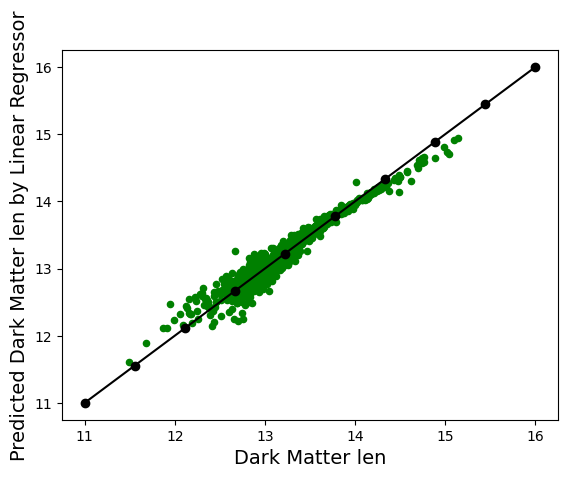

In [30]:
LRegressor = LinearRegression()
LRegressor.fit(X_train, Y_train)
LY_pred = LRegressor.predict(X_test)
print ("prediction : ", LY_pred)

LR = r2_score(Y_test, LY_pred)
print ("R2 Score : ", LR)

LMse = mean_squared_error(Y_test, LY_pred)
print ("The mean square value : ", LMse)

LScores = cross_validate(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
LS = np.mean(LScores['test_score'])
print ("The Score : ", LScores)
print ("Test Score : ", LS)
print ("Train Score : ", np.mean(LScores['train_score']))

LCvpred = cross_val_predict(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", LCvpred)

LC_coeff, LP_value = stats.pearsonr(LCvpred.reshape((1062,)), Target)
print("Pearson Correlation Coefficient:", LC_coeff)
print("P-value:", LP_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,LCvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Linear Regressor',fontsize=14)

Case 2d : **Random Forest** Model

prediction :  [13.72943137 12.70092172 12.96446044 12.87444256 13.33587244 12.98537142
 12.99050187 13.69815797 12.73984642 14.07900868 12.91239871 13.08408269
 12.97588554 13.28467831 13.40514416 13.52621956 12.85297682 13.90535251
 12.98243504 12.70734655 13.15520935 12.90915624 12.84998679 13.68141502
 12.73633842 12.87982879 13.00439833 13.72599898 13.64892439 12.72004679
 13.04892618 13.12550183 13.18362165 12.96531655 12.74545443 12.88794363
 12.8817645  12.93604884 12.79886588 12.74433357 12.98713755 13.70040447
 12.95115056 14.0772263  12.9370727  14.10381195 13.90985552 13.49665597
 12.8664133  13.03977315 14.29878379 14.18460013 13.09047333 13.05054048
 13.02690613 12.58766587 12.65260515 12.64527164 13.09383243 13.01502836
 13.59459491 13.92901912 13.02827807 13.17526263 13.505899   12.90763385
 12.9597575  12.99949704 13.01501435 13.5999678  12.30150708 12.81538657
 13.1500187  14.14702404 13.20337816 12.36798684 12.31517448 12.78008476
 12.90518344 13.71760759 12.86273689 

Text(0, 0.5, 'Predicted Dark Matter len by Random Forest Regressor')

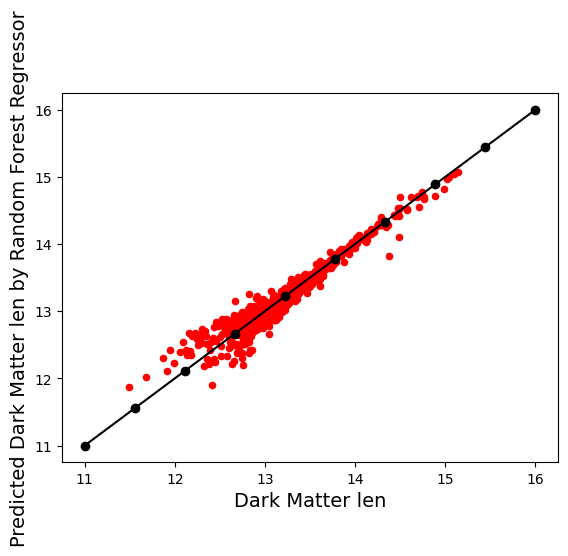

In [31]:
FORegressor = RandomForestRegressor()
FORegressor.fit(X_train, Y_train)
FOY_pred = FORegressor.predict(X_test)
print ("prediction : ", FOY_pred)

FOR = r2_score(Y_test, FOY_pred)
print ("R2 Score : ", FOR)

FOMse = mean_squared_error(Y_test, FOY_pred)
print ("The mean square value : ", FOMse)

FOScores = cross_validate(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
FOS = np.mean(FOScores['test_score'])
print ("The Score : ", FOScores)
print ("Test Score : ", FOS)
print ("Train Score : ", np.mean(FOScores['train_score']))

FOCvpred = cross_val_predict(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", FOCvpred)

FC_coeff, FP_value = stats.pearsonr(FOCvpred.reshape((1062,)), Target)
print("Pearson Correlation Coefficient:", FC_coeff)
print("P-value:", FP_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,FOCvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Random Forest Regressor',fontsize=14)

Case 2e : **Extra Random Trees** Model

prediction :  [13.71511814 12.7274275  12.9528458  12.78959614 13.33845539 12.98799122
 12.96790764 13.7242253  12.77493767 14.07553128 12.91919588 13.05750774
 12.99041552 13.28797897 13.39577578 13.52360581 12.86157077 13.88664736
 13.00352489 12.70084968 13.18882357 12.91287147 12.84576777 13.67122588
 12.78951128 12.82841771 13.02862775 13.73118842 13.60106693 12.62967354
 13.03300459 13.09618642 13.16872143 12.95245578 12.84006807 12.87057264
 12.84069231 12.90488482 12.7902974  12.74607986 12.97363409 13.7022241
 12.94145073 14.0839648  12.97199008 14.0801522  13.89350228 13.48139572
 12.89741876 13.05551227 14.29831252 14.20137901 13.10870327 13.05958433
 13.05468345 12.61913504 12.61700474 12.57360759 13.08918151 13.01251488
 13.59502652 13.91952629 13.01148219 13.17334878 13.49290949 12.8766062
 12.91706156 12.96928163 13.00374233 13.61200307 12.23129728 12.80452411
 13.13471677 14.17278919 13.13792791 12.36472547 12.45291392 12.78254512
 12.90408869 13.72975989 12.90688534 12

Text(0, 0.5, 'Predicted Dark Matter len by Extreme Random Forest Regressor')

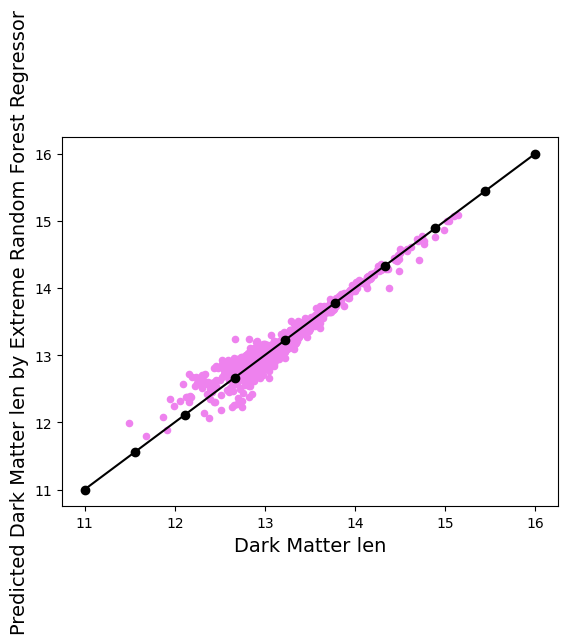

In [32]:
ETRegressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
ETRegressor.fit(X_train, Y_train)
ETY_pred = ETRegressor.predict(X_test)
print ("prediction : ", ETY_pred)

ETR = r2_score(Y_test, ETY_pred)
print ("R2 Score : ", ETR)

ETMse = mean_squared_error(Y_test, ETY_pred)
print ("The mean square value : ", ETMse)

ETScores = cross_validate(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
ETS = np.mean(ETScores['test_score'])
print ("The Score : ", ETScores)
print ("Test Score : ", ETS)
print ("Train Score : ", np.mean(ETScores['train_score']))

ETCvpred = cross_val_predict(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", ETCvpred)

ETC_coeff, ETP_value = stats.pearsonr(ETCvpred.reshape((1062,)), Target)
print("Pearson Correlation Coefficient:", ETC_coeff)
print("P-value:", ETP_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,ETCvpred, s = 20, c = 'violet')
plt.xlabel('Dark Matter len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Extreme Random Forest Regressor',fontsize=14)

Case 2f : **Neural Network** Model

Epoch 1/50
30/30 [==============================] - 2s 16ms/step - loss: 28.7122 - val_loss: 2.5954
Epoch 2/50
30/30 [==============================] - 0s 8ms/step - loss: 0.6198 - val_loss: 0.1540
Epoch 3/50
30/30 [==============================] - 0s 10ms/step - loss: 0.1653 - val_loss: 0.1397
Epoch 4/50
30/30 [==============================] - 0s 9ms/step - loss: 0.1286 - val_loss: 0.0988
Epoch 5/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0844 - val_loss: 0.0634
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0582 - val_loss: 0.0434
Epoch 7/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0428 - val_loss: 0.0311
Epoch 8/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0328 - val_loss: 0.0301
Epoch 9/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.0211
Epoch 10/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.0188
Epoch 11/50
30/3

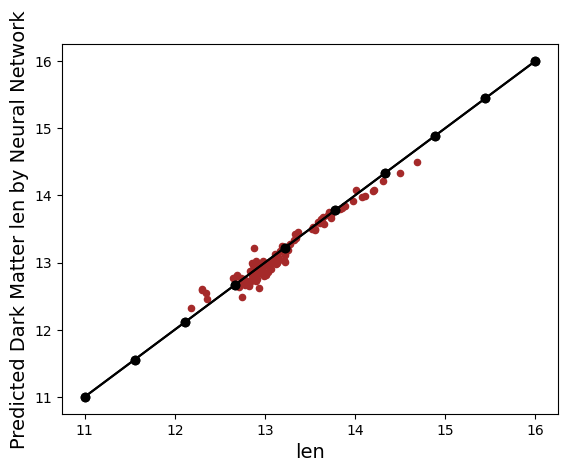

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

NNmodel = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(features.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

NNmodel.compile(optimizer='adam', loss='mean_squared_error')
NN = NNmodel.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32)

NNy_pred = NNmodel.predict(X_test)
print("Prediction:", NNy_pred)

NNr2 = r2_score(Y_test, NNy_pred)
print("R2 Score:", NNr2)

NNmse = mean_squared_error(Y_test, NNy_pred)
print("Mean Square Value:", NNmse)

NNC_coeff, NNP_value = stats.pearsonr(NNy_pred.reshape((107,)), Y_test)
print("Pearson Correlation Coefficient:", NNC_coeff)
print("P-value:", NNP_value)

m = np.linspace(11, 16, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Y_test, NNy_pred, s=20, c='brown')
plt.plot(m, m, color='black', linestyle='-', marker='o')
plt.xlabel('len', fontsize=14)
plt.ylabel('Predicted Dark Matter len by Neural Network', fontsize=14)

loss = NNmodel.evaluate(X_test, Y_test)
print("Neural Network nnmodel Loss:", loss)


Model Comparisons

 Model Comparisons for Case 1 


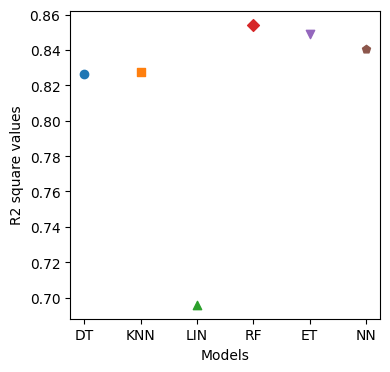

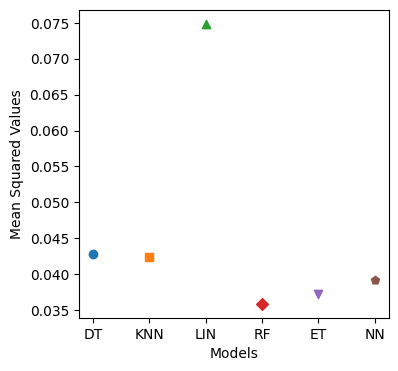

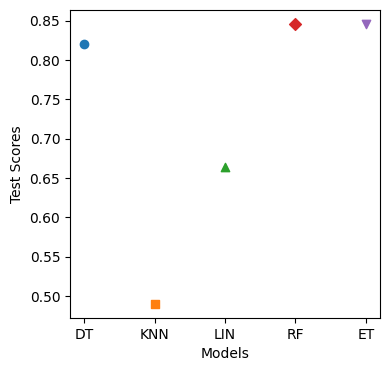

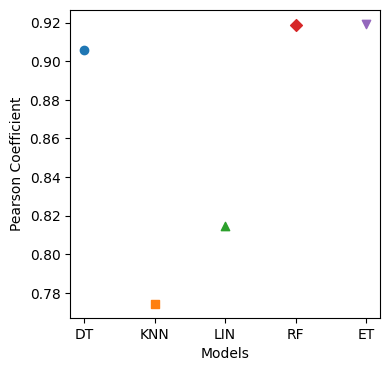

In [34]:
#COMPARISON GRAPH (CASE 1)

print ("\033[1m Model Comparisons for Case 1 \033[0m")

#R square

plt.figure(figsize=(4, 4))
k = [r, kr, lr, fr, etr, nnr2]
b = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(k)):
    plt.scatter(b[i], k[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#MSE

plt.figure(figsize=(4, 4))
kk = [mse, kmse, lmse, fmse, etmse, nnmse]
bb = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(kk)):
    plt.scatter(bb[i], kk[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
K = [s, ks, ls, fs, ets]
B = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(K)):
    plt.scatter(B[j], K[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
K = [c_coeff, kc_coeff, lc_coeff, fc_coeff, etc_coeff]
B = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(K)):
    plt.scatter(B[j], K[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()

 Model Comparisons for Case 2 


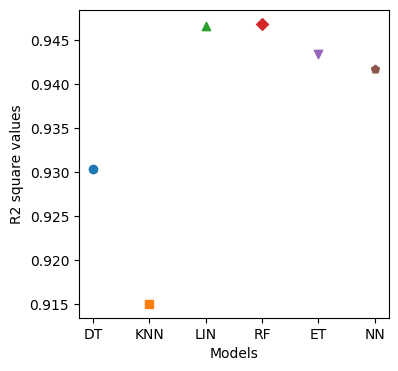

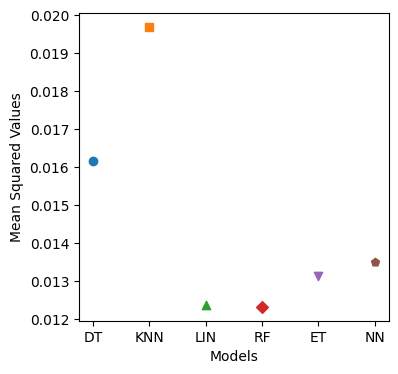

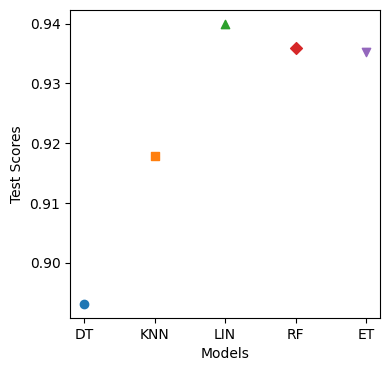

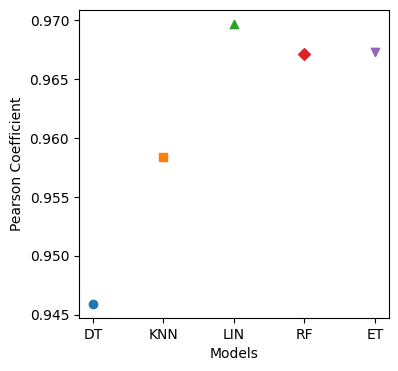

In [35]:
#COMPARISON GRAPH (CASE 2)

print ("\033[1m Model Comparisons for Case 2 \033[0m")

#R square
plt.figure(figsize=(4, 4))
g = [R, KR, LR, FOR, ETR, NNr2]
h = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(g)):
    plt.scatter(h[i], g[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#Mean Squared Error

plt.figure(figsize=(4, 4))
gg = [Mse, KMse, LMse, FOMse, ETMse, NNmse]
hh = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(gg)):
    plt.scatter(hh[i], gg[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
G = [S, KS, LS, FOS, ETS]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
G = [C_coeff, KC_coeff, LC_coeff, FC_coeff, ETC_coeff]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()